In [2]:
import sys, os
sys.path.append(os.path.join(sys.path[0], "code"))

In [3]:
import pytorch_models as models
import pytorch_samplers as samplers
import pytorch_losses as losses
import pytorch_training as training
import pytorch_utils as utils
import data_generation as dg
from matplotlib import cm, colors

import importlib
import time
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import random

importlib.reload(models)
importlib.reload(losses)
importlib.reload(samplers)
importlib.reload(training)
importlib.reload(utils)
importlib.reload(dg)

<module 'data_generation' from '/mnt/hdd/scarv/riemannian-metric-learning-ot/code/data_generation.py'>

In [4]:
torch.set_default_dtype(torch.float64)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

elapsed time: 263.0195903778076 s.
[-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]


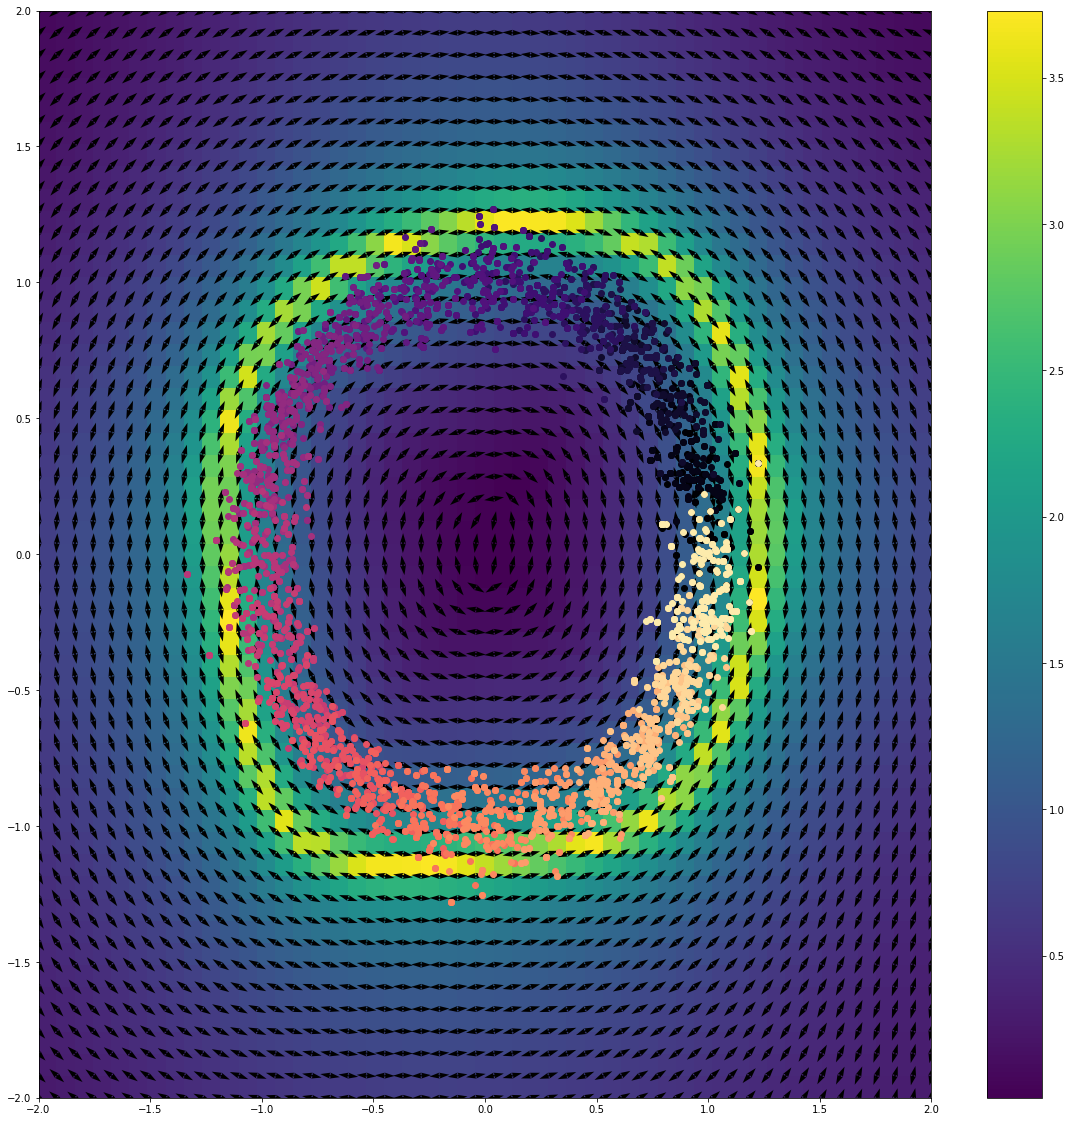

In [26]:
# Recover "Circular" metric

seed = 0
fpath = "data/synthetic/data_gic_24_gaussians_radius_1_std_0p1_100_samples_closed.pt"
time_skip = 1
n_samples = 100
samples_per_batch = 100
space_dims = 2
scalar_hidden_dims = 32
matrix_hidden_dims = 32
gp_strength_phi_initial = 1e-3
gp_strength_phi_later = 1e-4
gp_strength_R = 1e0
fro_reg_strength = 1e3
lr = 1e-2
weight_decay = 5e-1
n_epochs_phi = 300
n_epochs_R = 1000
n_steps = 2

t0 = time.time()
CircularA_learned, circ_phis, circ_rho_0s, circ_rho_1s, circ_losses = training.multistep_train_synthetic(fpath,
                                                                                                         time_skip,
                                                                                                         n_samples,
                                                                                                         samples_per_batch,
                                                                                                         scalar_hidden_dims,
                                                                                                         matrix_hidden_dims,
                                                                                                         fro_reg_strength,
                                                                                                         gp_strength_phi_initial,
                                                                                                         gp_strength_phi_later,
                                                                                                         gp_strength_R,
                                                                                                         lr,
                                                                                                         weight_decay,
                                                                                                         n_epochs_phi,
                                                                                                         n_epochs_R,
                                                                                                         n_steps,
                                                                                                         seed
                                                                                                        )

t1 = time.time()
print('elapsed time: ' + str(t1-t0) + ' s.')

# Plot the eigenvectors of the metric
plt.figure(figsize=(20,20))
n = 50
x_lims = (-2,2)
y_lims = (-2,2)
utils.eigs_quiver(CircularA_learned, n, x_lims, y_lims)
norm = colors.Normalize(vmin=0, vmax=len(circ_rho_0s[0]))
cmap = cm.magma
for i in range(len(circ_rho_0s[0])):
    rho_samples = circ_rho_0s[0][i].sample(100).squeeze().cpu()
    plt.scatter(rho_samples[:,0], rho_samples[:,1], color=cmap(norm(i)))
    rho_samples = circ_rho_1s[0][i].sample(100).squeeze().cpu()
    plt.scatter(rho_samples[:,0], rho_samples[:,1], color=cmap(norm(i)))

elapsed time: 853.1529457569122 s.
[-15.         -14.3877551  -13.7755102  -13.16326531 -12.55102041
 -11.93877551 -11.32653061 -10.71428571 -10.10204082  -9.48979592
  -8.87755102  -8.26530612  -7.65306122  -7.04081633  -6.42857143
  -5.81632653  -5.20408163  -4.59183673  -3.97959184  -3.36734694
  -2.75510204  -2.14285714  -1.53061224  -0.91836735  -0.30612245
   0.30612245   0.91836735   1.53061224   2.14285714   2.75510204
   3.36734694   3.97959184   4.59183673   5.20408163   5.81632653
   6.42857143   7.04081633   7.65306122   8.26530612   8.87755102
   9.48979592  10.10204082  10.71428571  11.32653061  11.93877551
  12.55102041  13.16326531  13.7755102   14.3877551   15.        ]


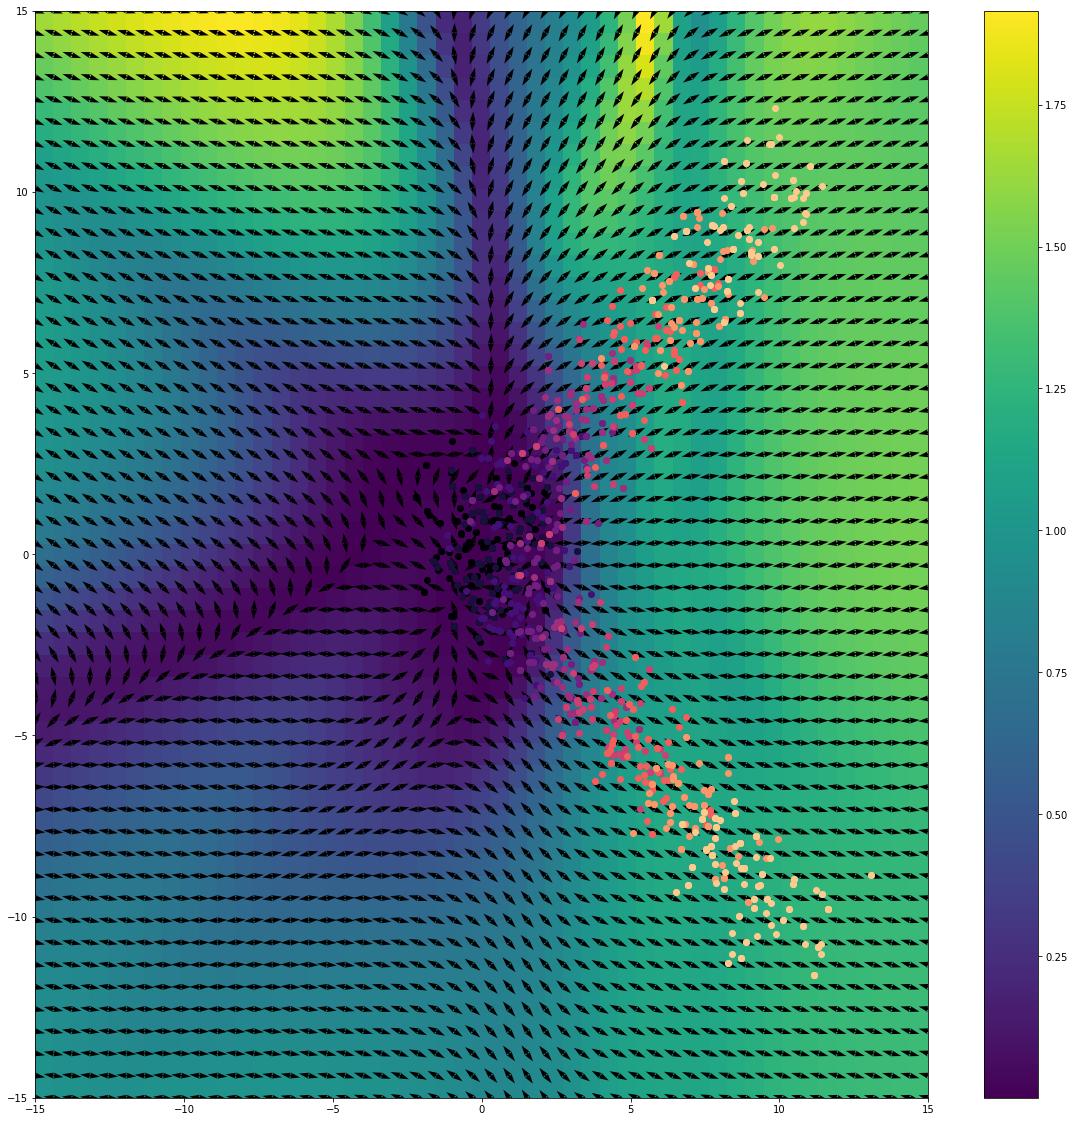

In [18]:
# Recover "Mass Splitting" metric

seed = 0
fpath = "data/synthetic/data_mass_split_std_1_100_samples_8_intermediate_scale_x10.pt"
time_skip = 1
n_samples = 100
samples_per_batch = 100
space_dims = 2
scalar_hidden_dims = 32
matrix_hidden_dims = 32
gp_strength_phi_initial = 2e-0
gp_strength_phi_later = 1e-5
gp_strength_R = 1e0
fro_reg_strength = 1e6
lr = 5e-3
weight_decay = 1e-3
n_epochs_phi = 600
n_epochs_R = 20000
n_steps = 1

t0 = time.time()
MassSplittingA_learned, ms_phis, ms_rho_0s, ms_rho_1s, ms_losses = training.multistep_train_synthetic(fpath,
                                                                                                      time_skip,
                                                                                                      n_samples,
                                                                                                      samples_per_batch,
                                                                                                      scalar_hidden_dims,
                                                                                                      matrix_hidden_dims,
                                                                                                      fro_reg_strength,
                                                                                                      gp_strength_phi_initial,
                                                                                                      gp_strength_phi_later,
                                                                                                      gp_strength_R,
                                                                                                      lr,
                                                                                                      weight_decay,
                                                                                                      n_epochs_phi,
                                                                                                      n_epochs_R,
                                                                                                      n_steps,
                                                                                                      seed,
                                                                                                      R_init=None
                                                                                                     )

t1 = time.time()
print('elapsed time: ' + str(t1-t0) + ' s.')

# Plot the eigenvectors of the metric
plt.figure(figsize=(20,20))
n = 50
x_lims = (-2.5,15)
y_lims = (-15,15)
utils.eigs_quiver(MassSplittingA_learned, n, x_lims, y_lims)
norm = colors.Normalize(vmin=0, vmax=len(ms_rho_0s[0]))
cmap = cm.magma
for i in range(len(ms_rho_0s[0])):
    rho_samples = ms_rho_0s[0][i].sample(100).squeeze().cpu()
    plt.scatter(rho_samples[:,0], rho_samples[:,1], color=cmap(norm(i)))
    rho_samples = ms_rho_1s[0][i].sample(100).squeeze().cpu()
    plt.scatter(rho_samples[:,0], rho_samples[:,1], color=cmap(norm(i)))

elapsed time: 9559.34373164177 s.
[-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]


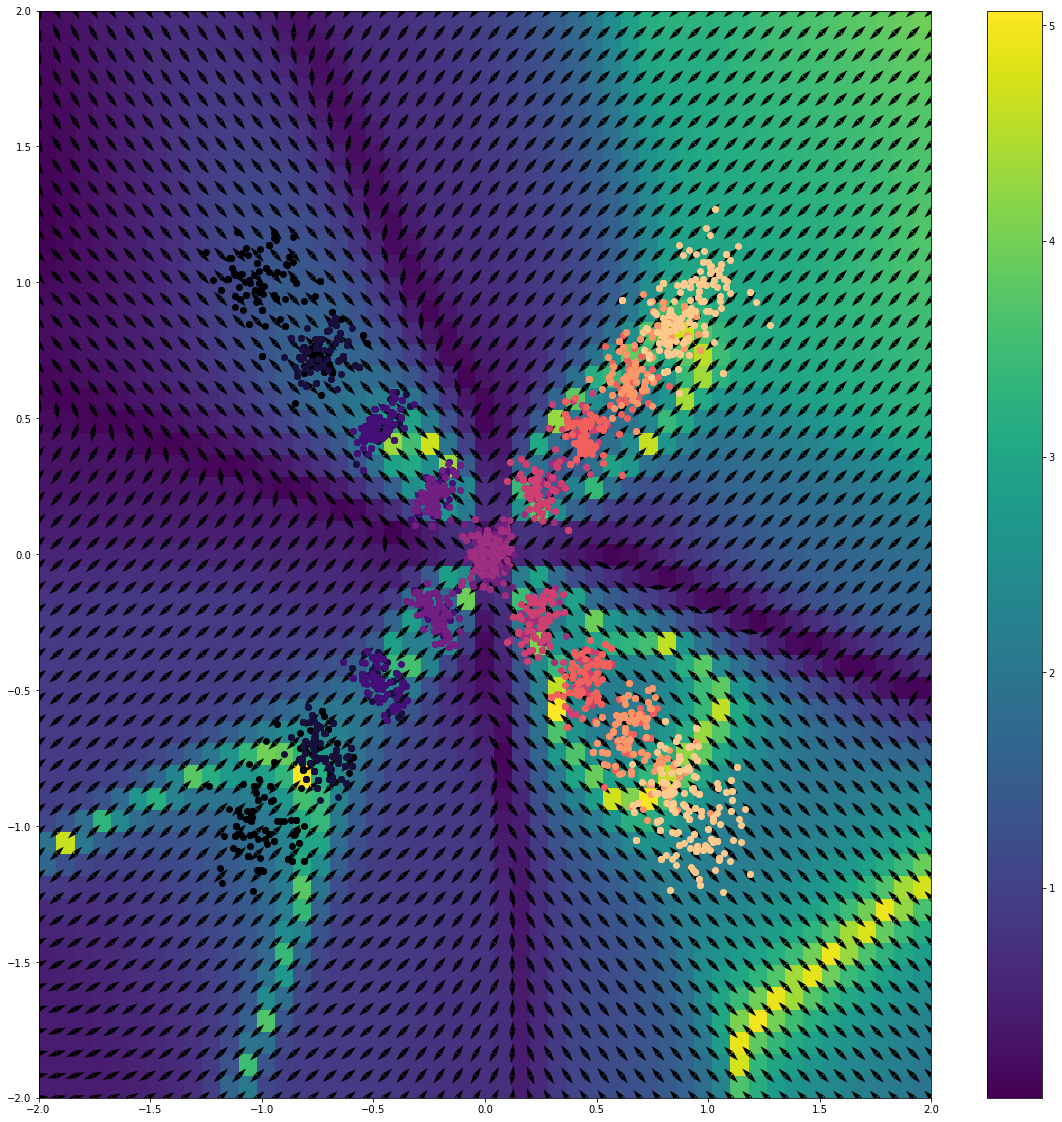

In [23]:
# Recover "X Paths" metric

seed = 0
fpath = "data/synthetic/data_xpath_std_0p1_100_samples_8_intermediate.pt"
time_skip = 1
n_samples = 100
samples_per_batch = 100
space_dims = 2
scalar_hidden_dims = 32
matrix_hidden_dims = 32
gp_strength_phi_initial = 1e-3
gp_strength_phi_later = 1e-4
gp_strength_R = 1e0
fro_reg_strength = 1e3
lr = 1e-2
weight_decay = 5e-3
n_epochs_phi = 300
n_epochs_R = 40000
n_steps = 3

t0 = time.time()
XPathsA_learned, xpath_phis, xpath_rho_0s, xpath_rho_1s, xpath_losses = training.multistep_train_synthetic(fpath,
                                                                                                           time_skip,
                                                                                                           n_samples,
                                                                                                           samples_per_batch,
                                                                                                           scalar_hidden_dims,
                                                                                                           matrix_hidden_dims,
                                                                                                           fro_reg_strength,
                                                                                                           gp_strength_phi_initial,
                                                                                                           gp_strength_phi_later,
                                                                                                           gp_strength_R,
                                                                                                           lr,
                                                                                                           weight_decay,
                                                                                                           n_epochs_phi,
                                                                                                           n_epochs_R,
                                                                                                           n_steps,
                                                                                                           seed,
                                                                                                           R_init = None
                                                                                                          )

t1 = time.time()
print('elapsed time: ' + str(t1-t0) + ' s.')

# Plot the eigenvectors of the metric
plt.figure(figsize=(20,20))
n = 50
x_lims = (-2,2)
y_lims = (-2,2)
utils.eigs_quiver(XPathsA_learned, n, x_lims, y_lims)
norm = colors.Normalize(vmin=0, vmax=len(xpath_rho_0s[0]))
cmap = cm.magma
for i in range(len(xpath_rho_0s[0])):
    rho_samples = xpath_rho_0s[0][i].sample(100).squeeze().cpu()
    plt.scatter(rho_samples[:,0], rho_samples[:,1], color=cmap(norm(i)))
    rho_samples = xpath_rho_1s[0][i].sample(100).squeeze().cpu()
    plt.scatter(rho_samples[:,0], rho_samples[:,1], color=cmap(norm(i)))
for i in range(len(xpath_rho_0s[1])):
    rho_samples = xpath_rho_0s[1][i].sample(100).squeeze().cpu()
    plt.scatter(rho_samples[:,0], rho_samples[:,1], color=cmap(norm(i)))
    rho_samples = xpath_rho_1s[1][i].sample(100).squeeze().cpu()
    plt.scatter(rho_samples[:,0], rho_samples[:,1], color=cmap(norm(i)))

In [19]:
# Save models

CircularA_learned_path = "trained_models/CircularA_learned_params.pt"
torch.save(CircularA_learned.state_dict(), CircularA_learned_path)

MassSplittingA_learned_path = "trained_models/MassSplittingA_learned_params.pt"
torch.save(MassSplittingA_learned.state_dict(), MassSplittingA_learned_path)

XPathsA_learned_path = "trained_models/XPathsA_learned_params.pt"
torch.save(XPathsA_learned.state_dict(), XPathsA_learned_path)

In [12]:
# Define ground truth models

true_circular = dg.CircularA().to(device)
true_mass_splitting = dg.MassSplittingA().to(device)
true_xpaths = dg.XPathsA().to(device)

In [13]:
# Load training data

fpath_circ = "data/synthetic/data_gic_24_gaussians_radius_1_std_0p1_100_samples_closed.pt"
data_circ = torch.load(fpath_circ).detach().cpu()

fpath_ms = "data/synthetic/data_mass_split_std_1_100_samples_8_intermediate_scale_x10.pt"
data_ms = torch.load(fpath_ms).detach().cpu()

fpath_xpath = "data/synthetic/data_xpath_std_0p1_100_samples_8_intermediate.pt"
data_xpath = torch.load(fpath_xpath).detach().cpu()

In [20]:
# Load models

CircularA_learned = models.PSDMatrixMultiLayer(space_dims, matrix_hidden_dims).to(device)
CircularA_learned.load_state_dict(torch.load(CircularA_learned_path))

MassSplittingA_learned = models.PSDMatrixMultiLayer(space_dims, matrix_hidden_dims).to(device)
MassSplittingA_learned.load_state_dict(torch.load(MassSplittingA_learned_path))

XPathsA_learned = models.PSDMatrixMultiLayer(space_dims, matrix_hidden_dims).to(device)
XPathsA_learned.load_state_dict(torch.load(XPathsA_learned_path))

<All keys matched successfully>

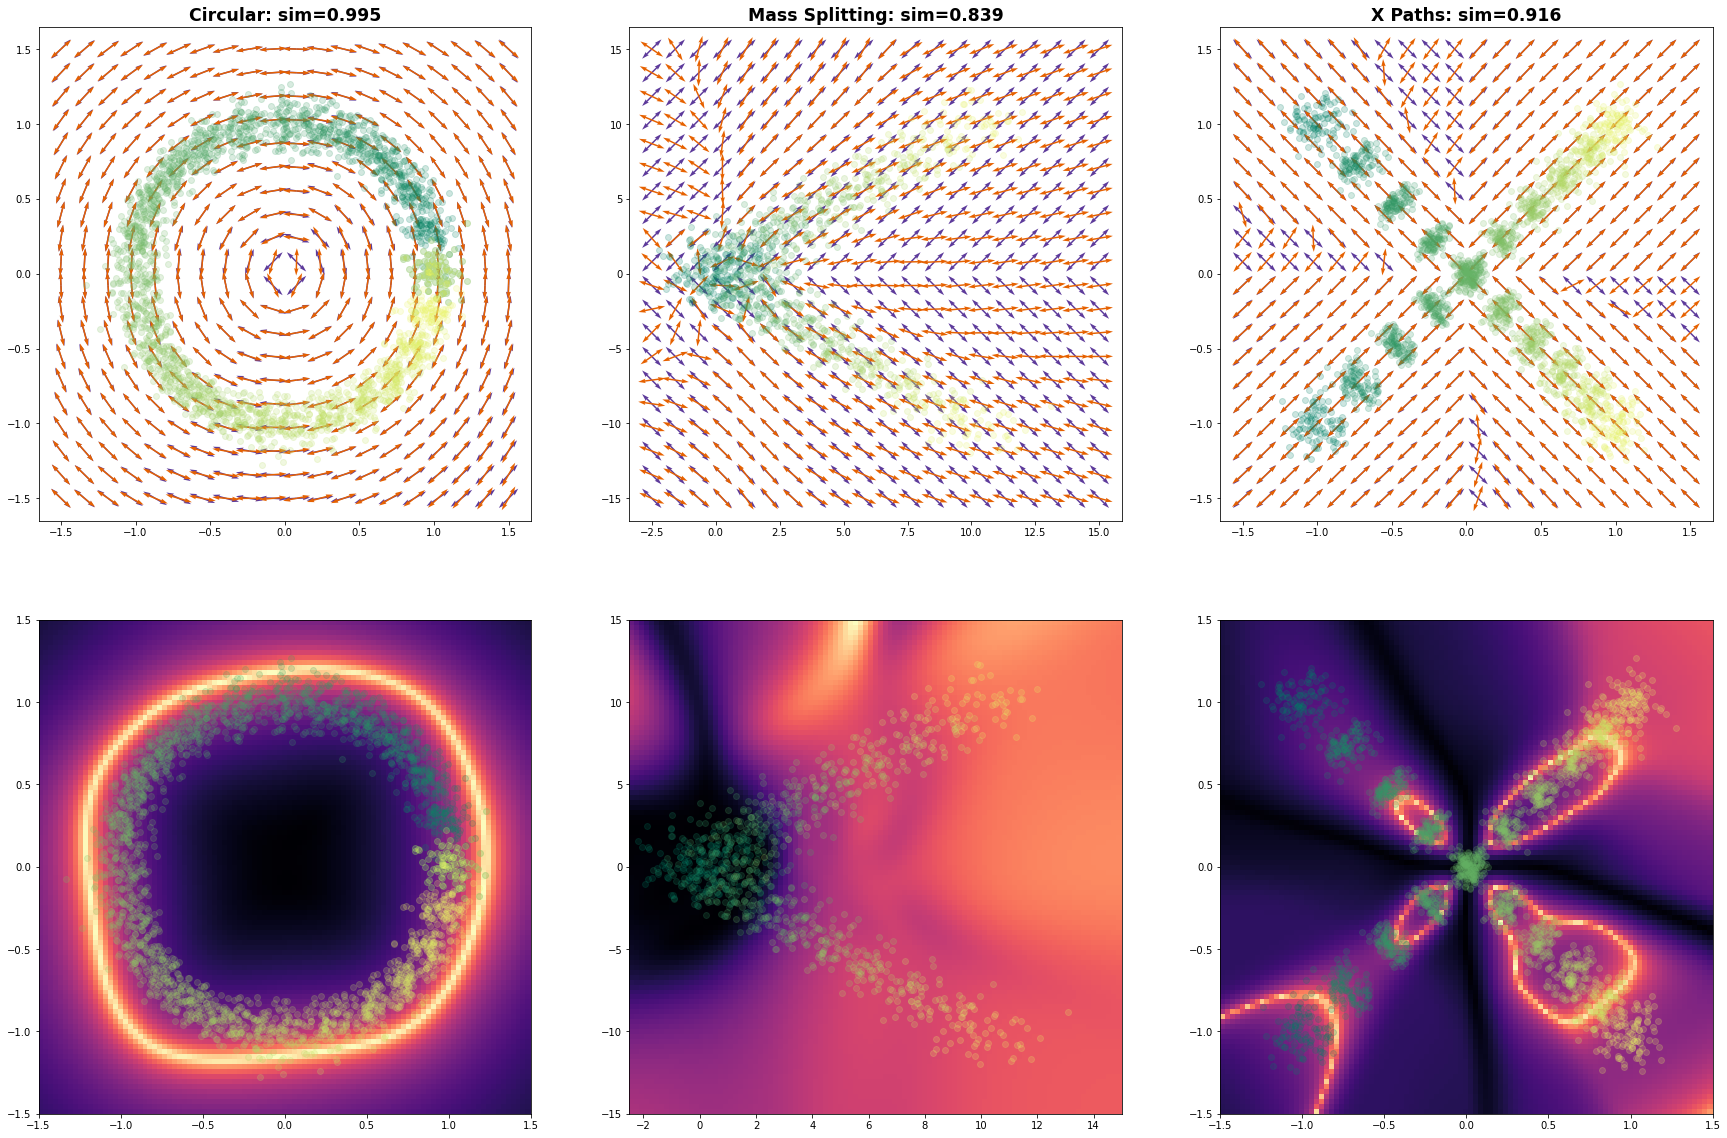

In [22]:
# Construct plot

fig, axs = plt.subplots(2,3, figsize=(30,20))

# Plot circular true vs learned eigs
x_lims_circ = (-1.5,1.5)
y_lims_circ = (-1.5,1.5)
n = 20
utils.eigs_quiver_comparison(axs[0,0], true_circular, CircularA_learned, n, x_lims_circ, y_lims_circ)
utils.eigs_quiver_with_conds(axs[1,0], CircularA_learned, 100, x_lims_circ, y_lims_circ)


# Plot mass splitting true vs learned eigs
x_lims_ms = (-2.5,15)
y_lims_ms = (-15,15)
n = 20
utils.eigs_quiver_comparison(axs[0,1], true_mass_splitting, MassSplittingA_learned, n, x_lims_ms, y_lims_ms)
utils.eigs_quiver_with_conds(axs[1,1], MassSplittingA_learned, 100, x_lims_ms, y_lims_ms)

# Plot xpath true vs learned eigs
x_lims_xpath = (-1.5,1.5)
y_lims_xpath = (-1.5,1.5)
n = 20
utils.eigs_quiver_comparison(axs[0,2], true_xpaths, XPathsA_learned, n, x_lims_xpath, y_lims_xpath)
utils.eigs_quiver_with_conds(axs[1,2], XPathsA_learned, 100, x_lims_xpath, y_lims_xpath)

# Plot circular training data
norm_circ = colors.Normalize(vmin=0, vmax=data_circ.shape[0])
cmap = cm.summer
for t in range(data_circ.shape[0]):
    axs[0,0].scatter(data_circ[t,:,0], data_circ[t,:,1], color=cmap(norm_circ(t)), alpha=0.2)
    axs[1,0].scatter(data_circ[t,:,0], data_circ[t,:,1], color=cmap(norm_circ(t)), alpha=0.2)
    
# Plot mass split training data
norm_ms = colors.Normalize(vmin=0, vmax=data_ms.shape[0])
cmap = cm.summer
for t in range(data_ms.shape[0]):
    axs[0,1].scatter(data_ms[t,:,0], data_ms[t,:,1], color=cmap(norm_ms(t)), alpha=0.2)
    axs[1,1].scatter(data_ms[t,:,0], data_ms[t,:,1], color=cmap(norm_ms(t)), alpha=0.2)
    
# Plot xpath training data
norm_xpath = colors.Normalize(vmin=0, vmax=data_xpath.shape[1])
cmap = cm.summer
for t in range(data_xpath.shape[1]):
    axs[0,2].scatter(data_xpath[0,t,:,0], data_xpath[0,t,:,1], color=cmap(norm_xpath(t)), alpha=0.2)
    axs[1,2].scatter(data_xpath[0,t,:,0], data_xpath[0,t,:,1], color=cmap(norm_xpath(t)), alpha=0.2)
    axs[0,2].scatter(data_xpath[1,t,:,0], data_xpath[1,t,:,1], color=cmap(norm_xpath(t)), alpha=0.2)
    axs[1,2].scatter(data_xpath[1,t,:,0], data_xpath[1,t,:,1], color=cmap(norm_xpath(t)), alpha=0.2)

# Compute similarity scores

n = 100
box_radius_circ = 1.5
space_dims = 2
#circular_sim = utils.eigs_similarity_metric(true_circular, CircularA_learned, n, box_radius_circ, space_dims)
circular_sim = utils.eigs_similarity_metric(true_circular, CircularA_learned, n, x_lims_circ, y_lims_circ, space_dims)

n = 100
box_radius_ms = 15
space_dims = 2
#ms_sim = utils.eigs_similarity_metric(true_mass_splitting, MassSplittingA_learned, n, box_radius_ms, space_dims)
ms_sim = utils.eigs_similarity_metric(true_mass_splitting, MassSplittingA_learned, n, x_lims_ms, y_lims_ms, space_dims)

n = 100
box_radius_xp = 1.5
space_dims = 2
#xp_sim = utils.eigs_similarity_metric(true_xpaths, XPathsA_learned, n, box_radius_xp, space_dims)
xp_sim = utils.eigs_similarity_metric(true_xpaths, XPathsA_learned, n, x_lims_xpath, y_lims_xpath, space_dims)

axs[0,0].set_title("Circular: sim=" + "{:.3f}".format(circular_sim), fontsize="xx-large", fontweight="bold")
axs[0,1].set_title("Mass Splitting: sim=" + "{:.3f}".format(ms_sim), fontsize="xx-large", fontweight="bold")
axs[0,2].set_title("X Paths: sim=" + "{:.3f}".format(xp_sim), fontsize="xx-large", fontweight="bold")

# Save figure
plt.savefig("results/metric_recovery_plot.png", dpi=300, bbox_inches="tight")